# Convolution & Pooling 
1. Convolution
2. Pooling

### Convolution (합성곱)
* https://en.wikipedia.org/wiki/Convolution

콘볼루션은 두 개의 함수를 곱해서 다른 함수를 만드는 연산이다. 일반적인 상관관계를 구하는 것과 다른 점은 두 함수 중 하나를 $f(x) \rightarrow f(-t)$ 반전시켜 곱한다는 점이다. 정확히는 다음과 같은 수학적 정의를 따른다.
$$ (f*g)(x) = \int_{-\infty}^{\infty} f(y) g(x-y) d y =\int_{-\infty}^{\infty} f(x-y) g(y) dy. $$
아래 예시를 통해 위 식의 의미를 곰곰히 살펴보자. 
(참고: x공간에서 콘볼루션은 푸리에 변환을 한 k-공간에서는 단순 곱에 대응된다. 이 강의와는 관계가 없지만 중요한 성질이므로 알아두면 유용하다.)

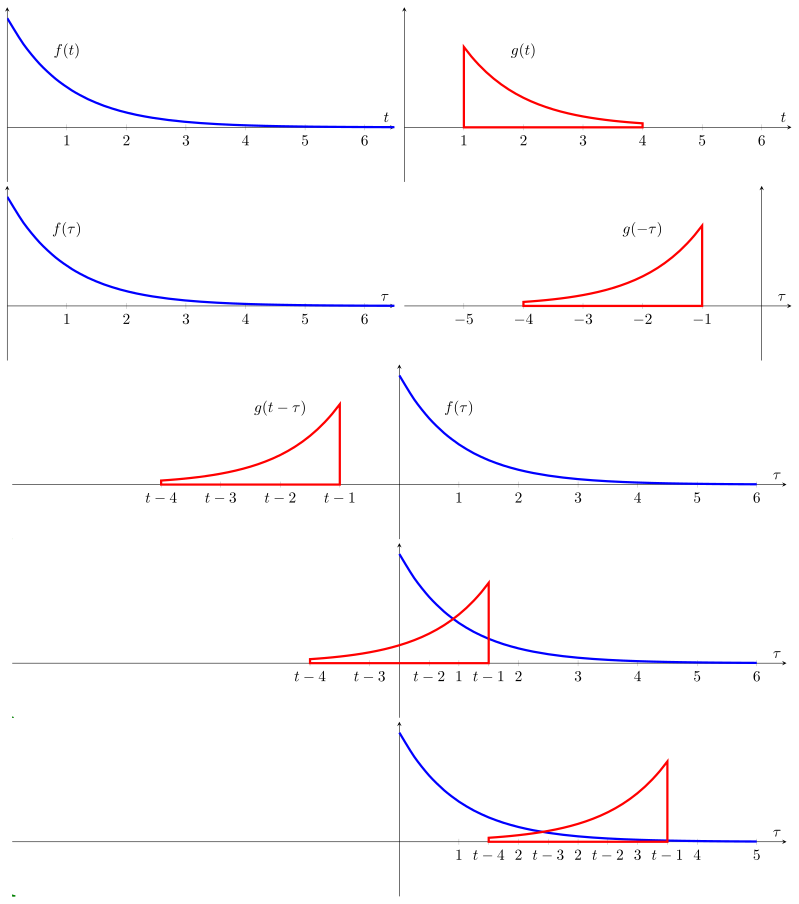

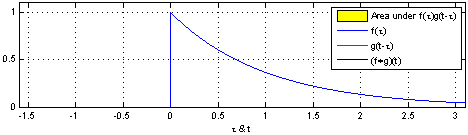
(그림출처: https://en.wikipedia.org/wiki/Convolution)

### Convolution and image processing

컨볼루션과 이미지를 처리하는 과정 사이에 어떤 관계가 있는지 살펴보자.

In [55]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(X, y), (X_test, y_test) = mnist.load_data()

(5, <matplotlib.image.AxesImage at 0x7ff86d3415d0>)

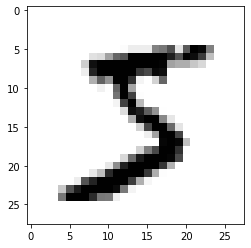

In [57]:
y[0], plt.imshow(X[0],cmap=plt.cm.binary)

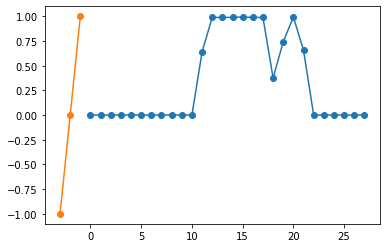

In [60]:
plt.plot(X[1][8]/255,'-o')
plt.plot([-3,-2,-1],[-1,0,1],'-o')

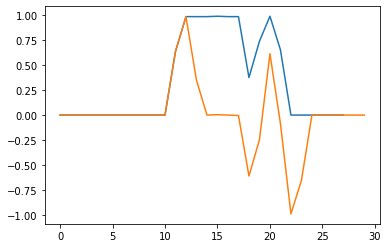

In [61]:
plt.plot(X[1][8]/255,'-')
plt.plot(np.convolve(X[1][8]/255, [1,0,-1]),'-')

* 즉 컨볼루션을 계산하먄 커널(컨볼루션 행렬)과 비슷한 패턴을 찾게 된다.

### Convolution example

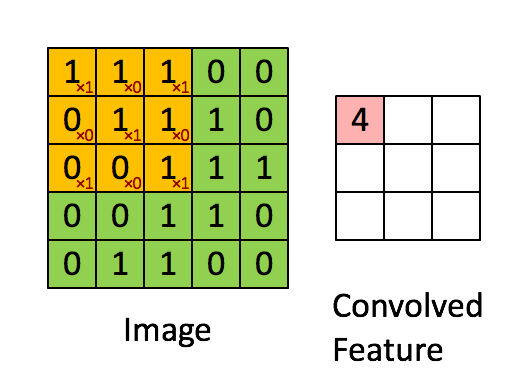
(그림출처: https://www.kaggle.com/amarjeet007/visualize-cnn-with-keras)

In [62]:
from scipy import signal

kern=[[-1,0,1],[-1,0,1],[-1,0,1]]

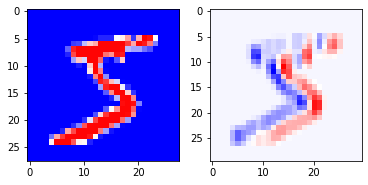

In [69]:
conv=signal.convolve2d(X[0],kern)
plt.subplot(121)
plt.imshow(X[0],cmap=plt.cm.bwr)

plt.subplot(122)
plt.imshow(conv,cmap=plt.cm.bwr)


### Pooling

풀링은 뉴런 클러스터를 하나의 출력(아웃풋)으로 바꾸는 과정을 말한다. 주로 컨볼루션의 결과로 나온 레이어의 사이즈를 바꾸는 과정에서 사용한다. 아래의 그림처럼 네 개의 뉴런 클러스터를 하나의 출력으로 바꾸는 과정이 그 예이다. 아래의 예시에서 맥스풀링은 네 개의 뉴런 중 가장 큰 값을 출력으로 하는 과정을 말하며 평균풀링은 네 개의 뉴런의 평균값을 출력으로 하는 과정을 말한다. 풀링을 통해서 출력값의 차원을 줄여 계산량을 줄이고 오버피팅을 방지하게 해준다.

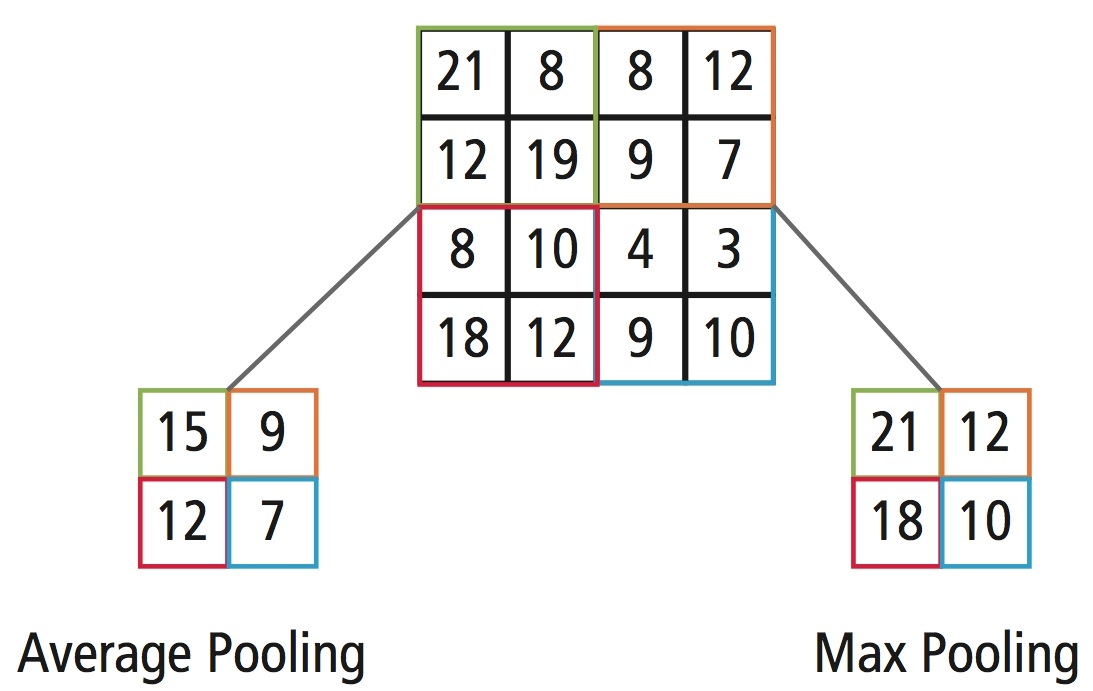
(그림출처: https://www.kaggle.com/amarjeet007/visualize-cnn-with-keras)